In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### EXERCISE 1.

What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. 
Give a 99% confidence interval for the average body temperature of healthy people.

In [2]:
x_bar = 98.25

In [3]:
sigma = 0.73

In [4]:
n = 130

In [5]:
# Standard error of mean

sem = sigma / np.sqrt(n)
sem

0.06402523540941313

In [6]:
# Margin of error for 99% confidence interval
moe = 2.576 * sem
moe

0.16492900641464822

In [7]:
# The upper confidence limit
upper_lim = x_bar + moe
upper_lim

98.41492900641465

In [8]:
# The lower confidence limit
lower_lim = x_bar - moe
lower_lim

98.08507099358535

In [9]:
# Alternative

In [10]:
ci_z = stats.norm.interval(0.99, 98.25, sem)
ci_z

(98.08508192246582, 98.41491807753418)

### EXERCISE 2.

In [11]:
sem = 3.1 / np.sqrt(500)
sem

0.13863621460498696

In [12]:
moe = 1.96 * sem
moe

0.27172698062577444

In [13]:
upper_lim = 5.4 + moe
upper_lim

5.671726980625775

In [14]:
lower_lim = 5.4 - moe
lower_lim

5.128273019374226

In [15]:
ci_z = stats.norm.interval(0.95, 5.4, sem)
ci_z

(5.12827801242126, 5.67172198757874)

### EXERCISE 3.

In [16]:
x_bar = 12.20
mu = 13.20
sigma = 2.50
n = 40

In [17]:
z = (x_bar - mu) / (sigma / np.sqrt(n))
z

-2.5298221281347035

In [18]:
p_value = stats.norm.cdf(z)
p_value

0.005706018193000826

In [19]:
alpha = .01

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


### EXERCISE 4.

In [20]:
soil = pd.read_csv("soil.csv")
soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [21]:
soil.describe()

,Soil1,Soil2
count,30.000000,35.000000
mean,1.691800,1.417114
std,0.206903,0.219184
min,1.110000,1.053000
25%,1.572000,1.231000
50%,1.675000,1.379000
75%,1.865250,1.559000
max,2.054000,1.878000


In [22]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [23]:
soil.isna().sum()

Soil1    5
Soil2    0
dtype: int64

In [24]:
# Because the sample size differs between the two types of soils, I will treat each soil as a separate sample rather than drop the missing values in Soil1.

In [25]:
twosample = stats.ttest_ind(soil[["Soil1"]].dropna(), soil[["Soil2"]])
twosample

Ttest_indResult(statistic=array([5.16814733]), pvalue=array([2.59322873e-06]))

In [26]:
alpha = 0.01
if twosample.pvalue<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


### EXERCISE 5.

In [27]:
pisa = pd.read_csv("2015 PISA Test.csv")

In [28]:
pisa.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [29]:
pisa.Continent_Code.value_counts(dropna=False)

EU     37
AS     17
SA      7
NaN     5
OC      2
AF      2
Name: Continent_Code, dtype: int64

In [30]:
pisa[pisa["Continent_Code"]=="AS"].describe()

,internet_users_per_100,Math,Reading,Science
count,17.000000,17.000000,17.000000,17.000000
mean,68.455613,466.216647,454.059682,467.945847
std,21.086060,64.356490,57.048962,56.671371
min,21.976068,380.259000,346.549000,386.485400
25%,50.300000,403.833200,408.102200,417.611200
50%,74.000000,459.816000,433.542300,456.483600
75%,84.948353,531.296100,508.690500,523.277400
max,92.884826,564.189700,535.100200,555.574700


In [31]:
pisa[pisa["Continent_Code"]=="EU"].describe()

,internet_users_per_100,Math,Reading,Science
count,37.000000,37.000000,37.000000,37.000000
mean,77.274888,477.981449,476.164608,478.299381
std,12.425773,35.150403,37.720545,34.450616
min,53.744979,371.311400,351.741500,383.682400
25%,68.632900,464.040100,452.514300,460.774900
50%,76.184000,489.728700,487.250100,490.225000
75%,87.479056,503.722000,499.814600,501.936900
max,98.200000,521.250600,526.424700,534.193700


In [32]:
pisa[pisa["Continent_Code"]=="SA"].describe()

,internet_users_per_100,Math,Reading,Science
count,7.000000,7.000000,7.000000,7.000000
mean,60.180494,402.887700,425.359229,421.747186
std,9.772455,18.128894,19.709688,18.470319
min,40.900000,377.069500,397.541400,396.683600
25%,57.116462,388.102200,416.126900,408.205450
50%,64.289000,409.033300,425.303100,424.590500
75%,66.321532,417.617650,431.922700,433.794600
max,69.198471,422.671400,458.570900,446.956100


In [33]:
pisa[pisa["Continent_Code"]=="OC"].describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,86.391704,494.559750,506.085650,511.648700
std,2.589686,0.938401,4.504341,2.340241
min,84.560519,493.896200,502.900600,509.993900
25%,85.476112,494.227975,504.493125,510.821300
50%,86.391704,494.559750,506.085650,511.648700
75%,87.307296,494.891525,507.678175,512.476100
max,88.222889,495.223300,509.270700,513.303500


In [34]:
pisa[pisa["Continent_Code"]=="AF"].describe()

,internet_users_per_100,Math,Reading,Science
count,2.000000,2.000000,2.000000,2.000000
mean,43.359918,363.212100,355.457400,381.074250
std,7.297226,5.099513,7.916909,7.536556
min,38.200000,359.606200,349.859300,375.745100
25%,40.779959,361.409150,352.658350,378.409675
50%,43.359918,363.212100,355.457400,381.074250
75%,45.939877,365.015050,358.256450,383.738825
max,48.519836,366.818000,361.055500,386.403400


In [35]:
continents = ["EU", "AS"]
df = pisa[pisa["Continent_Code"].isin(continents)]
df.Continent_Code.value_counts()


EU    37
AS    17
Name: Continent_Code, dtype: int64

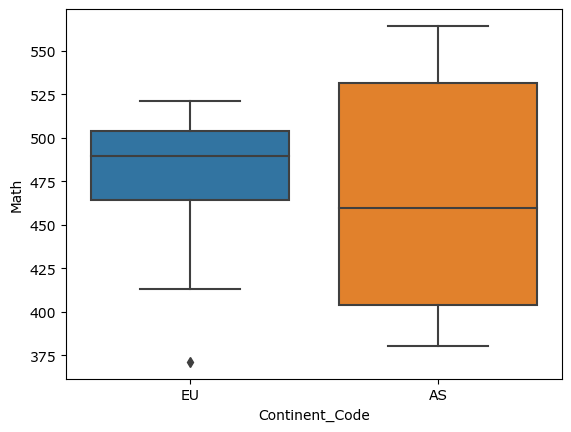

In [36]:
sns.boxplot(data=df, y = "Math", x="Continent_Code");

In [37]:
# eu_scores = df[df["Continent_Code"]=="EU"]
# as_scores = df[df["Continent_Code"]=="AS"]

# twosample = stats.ttest_ind(eu_scores.Math, as_scores.Math)
# twosample

twosample = stats.ttest_ind(df.loc[df["Continent_Code"]=="EU", "Math"], df[df["Continent_Code"]=="AS"]["Math"])
twosample

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

In [38]:
alpha = 0.05
if twosample.pvalue<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we fail to reject the null hypothesis.
